In [1]:
#Importing required modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model


from keras.regularizers import L1L2

# Data Preprocessing

In [2]:
#Loading the dataset

nd1=pd.read_csv("alldata5.csv")
nd1=nd1.append(pd.read_csv("alldata10.csv"))
nd1=nd1.append(pd.read_csv("alldata14.csv"))
nd1=nd1.sort_values("Match_id").reset_index(drop=True)

data3=pd.read_csv("data3.csv")
data4=pd.read_csv("data4.csv")
data3=data3.append(data4)
data3=data3.sort_values("Match_id").reset_index(drop=True)

X=nd1.drop(columns=["Result","Match_id"])
Y=nd1["Result"]
Y=Y.replace("Radiant",0)
Y=Y.replace("Dire",1)
X2=data3.drop(columns=["Result","Match_id"])
Y2=data3["Result"]
Y2=Y2.replace("Radiant",0)
Y2=Y2.replace("Dire",1)

In [3]:
#Data with only Heros
data3

,Match_id,Player_1_hero_id,Player_2_hero_id,Player_3_hero_id,Player_4_hero_id,Player_5_hero_id,Player_6_hero_id,Player_7_hero_id,Player_8_hero_id,Player_9_hero_id,Player_10_hero_id,Result
0,6268246973,30,28,72,91,11,3,68,17,52,42,Dire
1,6268247018,108,74,68,1,128,104,16,90,114,123,Dire
2,6268247184,25,18,38,136,71,50,74,103,47,54,Dire
3,6268247443,68,136,112,3,1,81,119,32,135,17,Dire
4,6268247492,81,84,128,48,39,111,53,73,123,42,Dire
...,...,...,...,...,...,...,...,...,...,...,...,...
28661,6276008172,53,11,20,93,100,62,26,99,1,106,Radiant
28662,6276010381,7,11,67,72,61,126,76,85,121,10,Dire
28663,6276011086,104,44,58,84,86,11,64,66,110,43,Dire
28664,6276017969,107,84,14,63,54,108,93,128,85,74,Radiant


In [4]:
X=X[["Player_1_item1","Player_1_item2","Player_1_item3","Player_1_item4","Player_1_item5","Player_1_backpack1","Player_1_backpack2","Player_1_backpack3","Player_2_item1","Player_2_item2","Player_2_item3","Player_2_item4","Player_2_item5","Player_2_backpack1","Player_2_backpack2","Player_2_backpack3","Player_3_item1","Player_3_item2","Player_3_item3","Player_3_item4","Player_3_item5","Player_3_backpack1","Player_3_backpack2","Player_3_backpack3","Player_4_item1","Player_4_item2","Player_4_item3","Player_4_item4","Player_4_item5","Player_4_backpack1","Player_4_backpack2","Player_4_backpack3","Player_5_item1","Player_5_item2","Player_5_item3","Player_5_item4","Player_5_item5","Player_5_backpack1","Player_5_backpack2","Player_5_backpack3","Player_6_item1","Player_6_item2","Player_6_item3","Player_6_item4","Player_6_item5","Player_6_backpack1","Player_6_backpack2","Player_6_backpack3","Player_7_item1","Player_7_item2","Player_7_item3","Player_7_item4","Player_7_item5","Player_7_backpack1","Player_7_backpack2","Player_7_backpack3","Player_8_item1","Player_8_item2","Player_8_item3","Player_8_item4","Player_8_item5","Player_8_backpack1","Player_8_backpack2","Player_8_backpack3","Player_9_item1","Player_9_item2","Player_9_item3","Player_9_item4","Player_9_item5","Player_9_backpack1","Player_9_backpack2","Player_9_backpack3","Player_10_item1","Player_10_item2","Player_10_item3","Player_10_item4","Player_10_item5","Player_10_backpack1","Player_10_backpack2","Player_10_backpack3"]]

In [5]:
l1=[]
l2=[]

for i in X2.itertuples():
  l1=[]

  for j in range(1,137):
    if j in i[1:6]:
      l1.append(1)
    else:
      l1.append(0)
  for j in range(1,137):
      if j in i[6:11]:
        l1.append(1)
      else:
        l1.append(0)  

  
  l2.append(l1)
  

Xoh=pd.DataFrame(l2)
print("One hot encoding of hero ids")
Xoh

One hot encoding of hero ids


,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28662,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28664,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
X3=pd.concat([X,Xoh[:26000]],axis=1)
print("Data with one hot encoded hero ids, items and backpacks")
X3

Data with one hot encoded hero ids, items and backpacks


,Player_1_item1,Player_1_item2,Player_1_item3,Player_1_item4,Player_1_item5,Player_1_backpack1,Player_1_backpack2,Player_1_backpack3,Player_2_item1,Player_2_item2,...,262,263,264,265,266,267,268,269,270,271
0,102,604,116,256,48,38,677,0,156,249,...,0,0,0,0,0,0,0,0,0,0
1,180,36,0,60,0,0,0,0,218,36,...,0,0,0,0,0,0,0,0,0,0
2,11,36,180,131,242,38,0,0,98,65,...,0,0,0,0,0,0,0,0,0,0
3,48,249,16,41,77,0,0,0,13,172,...,0,0,0,0,0,0,0,0,1,0
4,102,0,40,28,28,0,0,0,216,151,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,34,116,135,0,108,0,0,0,214,48,...,0,0,0,0,0,0,0,0,0,0
25996,1,50,151,116,36,0,0,0,0,1466,...,0,0,0,0,0,0,0,0,0,0
25997,1,229,40,36,214,0,0,0,123,100,...,0,0,0,0,0,0,0,0,0,1
25998,267,36,108,232,214,0,0,0,125,34,...,0,0,1,0,0,0,0,0,0,0


# Model 1 training

In [7]:
xtr,xtest,ytr,ytest= train_test_split(Xoh,Y2,test_size=0.2, random_state=1)
xtr=xtr.reset_index(drop="True")
ytr=ytr.reset_index(drop="True")
xtest=xtest.reset_index(drop="True")
ytest=ytest.reset_index(drop="True")

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_dim=xtr.shape[1],activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

model.summary

history=model.fit(xtr,ytr,batch_size=1000,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
23/23 [==============================] - 0s 21ms/step - loss: 0.7196 - accuracy: 0.5224 - val_loss: 0.6868 - val_accuracy: 0.5499
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.7089 - accuracy: 0.5331 - val_loss: 0.6820 - val_accuracy: 0.5607
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6971 - accuracy: 0.5439 - val_loss: 0.6786 - val_accuracy: 0.5703
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5484 - val_loss: 0.6762 - val_accuracy: 0.5725
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5565 - val_loss: 0.6743 - val_accuracy: 0.5774
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.5570 - val_loss: 0.6732 - val_accuracy: 0.5794
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5626 - val_loss: 0.6722 - val_accuracy: 0.5809
Epoch 8/100


In [9]:
# Test data accuracy
testloss,testacc=model.evaluate(xtest,ytest,verbose=0)
print("Accuracy on test data:",testacc)

Accuracy on test data: 0.5892919301986694


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


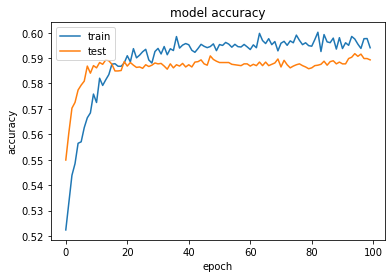

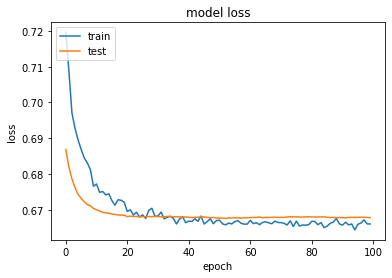

In [10]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2 training

In [11]:
xtr2,xtest2,ytr2,ytest2= train_test_split(X3,Y,test_size=0.2, random_state=1)
xtr2=xtr2.reset_index(drop="True")
ytr2=ytr2.reset_index(drop="True")
xtest2=xtest2.reset_index(drop="True")
ytest2=ytest2.reset_index(drop="True")

In [12]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_dim=xtr2.shape[1],activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

history=model2.fit(xtr2,ytr2,batch_size=1000,epochs=100,validation_data=(xtest2,ytest2))

Epoch 1/100
21/21 [==============================] - 0s 15ms/step - loss: 1.1060 - accuracy: 0.4881 - val_loss: 0.8040 - val_accuracy: 0.4806
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 1.0262 - accuracy: 0.5101 - val_loss: 0.7595 - val_accuracy: 0.5050
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9890 - accuracy: 0.5121 - val_loss: 0.7322 - val_accuracy: 0.5237
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9571 - accuracy: 0.5201 - val_loss: 0.7230 - val_accuracy: 0.5419
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9268 - accuracy: 0.5234 - val_loss: 0.7134 - val_accuracy: 0.5502
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.9064 - accuracy: 0.5256 - val_loss: 0.7071 - val_accuracy: 0.5556
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8821 - accuracy: 0.5275 - val_loss: 0.7017 - val_accuracy: 0.5665
Epoch 8/100


In [13]:
#Accuracy on test set
testloss2,testacc2=model2.evaluate(xtest2,ytest2,verbose=0)
print("Accuracy on test data:",testacc2)

Accuracy on test data: 0.7184615135192871


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


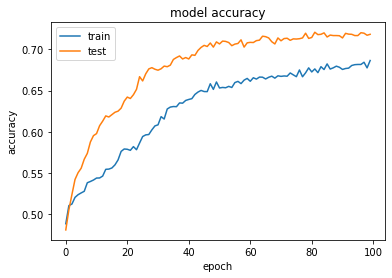

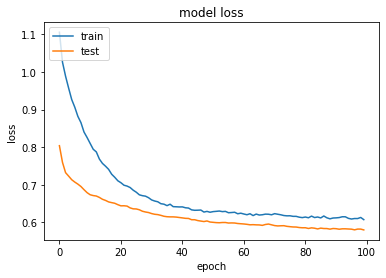

In [14]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predicting chances of winning

In [15]:
def prob(X):
  pred=model.predict(X)[0][0]
  print("Before the game begins: ")
  if(pred<0.5):
    print("Radiant has "+ str(np.round(100-pred*100,2)) +"% chance of winning.")
  else:
    print("Dire has "+ str(np.round(pred*100,2)) +"% chance of winning.")

def prob2(X):
  pred=model2.predict(X)[0][0]
  print("After choosing items: ")  
  if(pred<0.5):
    print("Radiant has "+ str( np.round(100-pred*100,2)) +"% chance of winning.")
  else:
    print("Dire has "+ str(np.round(pred*100,2)) +"% chance of winning.")


def mainpred(entries):
    for i in entries:
      df2=xtest2[i:i+1]
      df1=df2[df2.columns[80:]]

      print("For match id:",i)
      prob(df1)
      prob2(df2)
      print("\n")

### For testing purpose we have 5200 matchs in total .We can choose any match id between 0 to 5199


In [19]:
# Input the match id to be predict in list e
e=[222,100,132,555]
mainpred(e)

For match id: 222
Before the game begins: 
Radiant has 72.5% chance of winning.
After choosing items: 
Radiant has 57.33% chance of winning.


For match id: 100
Before the game begins: 
Radiant has 64.65% chance of winning.
After choosing items: 
Dire has 51.16% chance of winning.


For match id: 132
Before the game begins: 
Radiant has 60.39% chance of winning.
After choosing items: 
Dire has 68.01% chance of winning.


For match id: 555
Before the game begins: 
Radiant has 57.88% chance of winning.
After choosing items: 
Dire has 53.46% chance of winning.


